In [2]:
import numpy as np
import matplotlib.pyplot as plt

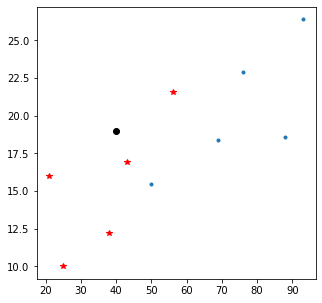

In [3]:
G1 = np.array( [[50, 69, 93, 76, 88 ], [15.5, 18.4, 26.4, 22.9, 18.6]] )
G2 = np.array( [[43, 56, 38, 21, 25 ], [16.9, 21.6, 12.2, 16, 10]] )
Data = np.array( [40, 19] )

fig = plt.figure(figsize=(5, 5))
plt.plot(G1[0], G1[1], '.')
plt.plot(G2[0], G2[1], 'r*')
plt.plot(Data[0], Data[1], 'ko')

In [4]:
def hanbetsu_bunseki2(G1, G2, Data):
    # 2変数の判別分析. G1,G2:学習データ. Data:判別したい新規データ.
    
    # マハラノビス距離
    tmp = np.dot( Data- np.mean(G1,axis=1), np.linalg.inv(np.cov(G1)) )
    D_G1= np.dot(tmp, (Data-np.mean(G1,axis=1) ).T )
    tmp = np.dot( Data- np.mean(G2,axis=1), np.linalg.inv(np.cov(G2)) )
    D_G2= np.dot(tmp, (Data-np.mean(G2,axis=1) ).T )
    
    if D_G1 < D_G2:
        Ans = 1
    else:
        Ans = 2
    
    return Ans

In [6]:
def seito_ritu(G1, G2):
    #グループ1の正答率
    True1 =0
    for i in range( len(G1[0]) ) :
        Data = G1[:,i]
        Ans = hanbetsu_bunseki2(G1, G2, Data)
        
        if Ans == 1:
            True1 = True1+1

    TrueR1 = True1/len(G1[0])
    
    #グループ2の正答率
    True2 = 0
    for i in range ( len(G2[0]) ):
        Data = G2[:,i]
        Ans = hanbetsu_bunseki2(G1, G2, Data)
        
        if Ans == 2:
            True2 = True2+1

    TrueR2 = True2/len(G2[0])
    
    return TrueR1, TrueR2

In [7]:
TrueR1, TrueR2 = seito_ritu(G1, G2)
[TrueR1, TrueR2]

[0.8, 1.0]

In [5]:
Ans= hanbetsu_bunseki2(G1, G2, Data)
Ans

2